## **Intro and theory**

In this model poject we will numerically solve the Black-Scholes-Merton pricing formula for a european call option. We use the formula and notation found John C. Hull's *Options, Futres and other derivatives 9th/10th edition chapter 15*. Specifically we use formula (15.20) from the book:

$C(S,T)=S_0N(d_1)-Ke^{-rT}N(d_2)$

where

$N(d)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d}e^{-\frac{1}{2}x^2}\,\mathrm{d} x$

$d_1=\frac {ln(S_0/K)+(r+\sigma^2)T}{\sigma\sqrt{T}}$

$d_2=\frac {ln(S_0/K)+(r-\sigma^2)T}{\sigma\sqrt{T}}$

Description of the parametes and variables:
+ C is the price of the option at time t.
+ S is the spot price of stock S at time t, with $S_0$ being the spot price at time = 0.
+ K is the strike price.
+ r is the risk-neutral interest rate.
+ $\sigma$ is the volatility of the stock S.
+ T is the time to maturity in years. At maturity T -> 0. It cannot be 0 since ln(0) is not defined.
+ N is a cumulative distribution of the standard normal variable d.
+ N(d1) is probability that the stocks S at time T exceeds the the value of S at time 0 under the condition that stock prices less than the strike price are counted as zero
+ N(d2) is the probability that you exercise your option

## **Solving the pricing formula**
The following code will be able solve the pricing formula. The only real hurdle is the integral from the probability function, but luckily scipy as simple method for that.

In [171]:
#We start by importing the packages we need:
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt

#We define our option funciton.
def option_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk-free interest rate
    #sigma: volatility of the stock S
    
    #defining the d's from the formulas above
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    #defining the call fucntion. We use scipy.stats.norm.cdf to handle the integrals
    call = (S * sci.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * sci.norm.cdf(d2, 0.0, 1.0))
    
    return call

Lets calculate some examples. We set K = 100, T = 0.5, r = 0.2, $\sigma$ = 0,15 and test with S = 120, 100 and 90:

In [172]:
example1=option_call(120, 100, 0.5, 0.02, 0.15)
example2=option_call(100, 100, 0.5, 0.02, 0.15)
example3=option_call(90, 100, 0.5, 0.02, 0.15)
print(example1,example2, example3)

21.15447065117654 4.724578170995322 1.0063803137347271


This seems in line with the theory. When the stock price S is above the strike price K we have have positive payoff, when the stock price is near the strike price we still have a positive payoff but it is less than before and when the stock price is under the strike price the payoff goes toward zero.

## **Analysis**
We will now see time how time to maturity(T), volatility($\sigma$) and risk-neutral intererest rate(r) affect the price of a call option. We start by seeing how volatity affects the price over different maturity times. Black-Scholes formulas are usually shown in a plot with the call price(C) on the y-axis and stock price(S) + strike price(K) on the x-axis. We will plot the example above but let S be a random value between 80 and 120, and let $\sigma$ take the values 0.15 and 0.45.

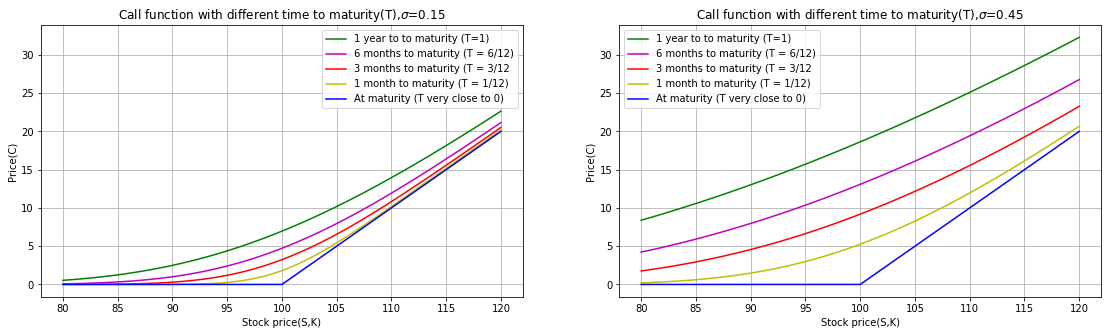

In [173]:
#We start by making a dataset for the stock price S. We make a numpy array that goes from 80 to 120 in 0.5 steps.
#Endstep is 120.5 because python shows up till BUT NOT INCLUDING last data point.
SS = np.arange(80, 120.5, 0.5)

#Defining our plot
fig = plt.figure(num=1, figsize=(19, 5), facecolor='w', edgecolor='k')
fig.clf()

ax1=plt.subplot(1, 2, 1)
plt.title("Call function with different time to maturity(T),$\sigma$=0.15")
plt.plot(SS,option_call(SS,100,1,0.02,0.15),'-g',label="1 year to to maturity (T=1)")
plt.plot(SS,option_call(SS,100,6/12,0.02,0.15),'-m',label="6 months to maturity (T = 6/12)")
plt.plot(SS,option_call(SS,100,3/12,0.02,0.15),'-r',label="3 months to maturity (T = 3/12")
plt.plot(SS,option_call(SS,100,1/12,0.02,0.15),'-y',label="1 month to maturity (T = 1/12)")
plt.plot(SS,option_call(SS,100,0.000000001,0.02,0.15),'-b',label="At maturity (T very close to 0)")
plt.ylabel('Price(C)')
plt.xlabel('Stock price(S,K)')
plt.grid()
plt.legend()


plt.subplot(1, 2, 2, sharey=ax1)#shary is used make this subplot have same y-axis as the ax1 subplot
plt.title("Call function with different time to maturity(T),$\sigma$=0.45")
plt.plot(SS,option_call(SS,100,1,0.02,0.45),'-g',label="1 year to to maturity (T=1)")
plt.plot(SS,option_call(SS,100,6/12,0.02,0.45),'-m',label="6 months to maturity (T = 6/12)")
plt.plot(SS,option_call(SS,100,3/12,0.02,0.45),'-r',label="3 months to maturity (T = 3/12")
plt.plot(SS,option_call(SS,100,1/12,0.02,0.45),'-y',label="1 month to maturity (T = 1/12)")
plt.plot(SS,option_call(SS,100,0.000000001,0.02,0.45),'-b',label="At maturity (T very close to 0)")
plt.ylabel('Price(C)')
plt.xlabel('Stock price(S,K)')
plt.grid()
plt.legend()

The blue line show the option price at maturity while the other lines shows the option price at different T-values. At maturity we see that if K<0 then C=0 and that each unit K is above S corrensponds to a 1:1 price increaes in C. We can also see that everything being equal, a higher T gives a higher price. This makes sense since the longer you have to wait to exercise your option the more risky it is therefore increasing the price. Comparing the two figures we also see that a higher volatily gives a higher price. This also makes sense since volatility is risk.

We now do the same but with different risk free interest rates instead of volatility

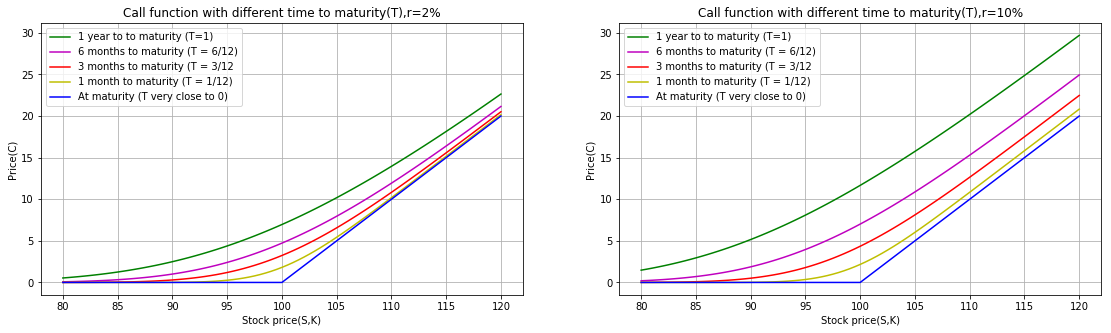

In [174]:
#Defining our plot
fig = plt.figure(num=1, figsize=(19, 5), facecolor='w', edgecolor='k')
fig.clf()

ax1=plt.subplot(1, 2, 1)
plt.title("Call function with different time to maturity(T),r=2%")
plt.plot(SS,option_call(SS,100,1,0.02,0.15),'-g',label="1 year to to maturity (T=1)")
plt.plot(SS,option_call(SS,100,6/12,0.02,0.15),'-m',label="6 months to maturity (T = 6/12)")
plt.plot(SS,option_call(SS,100,3/12,0.02,0.15),'-r',label="3 months to maturity (T = 3/12")
plt.plot(SS,option_call(SS,100,1/12,0.02,0.15),'-y',label="1 month to maturity (T = 1/12)")
plt.plot(SS,option_call(SS,100,0.000000001,0.02,0.15),'-b',label="At maturity (T very close to 0)")
plt.ylabel('Price(C)')
plt.xlabel('Stock price(S,K)')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2, sharey=ax1)#shary is used make this subplot have same y-axis as the ax1 subplot
plt.title("Call function with different time to maturity(T),r=10%")
plt.plot(SS,option_call(SS,100,1,0.1,0.15),'-g',label="1 year to to maturity (T=1)")
plt.plot(SS,option_call(SS,100,6/12,0.1,0.15),'-m',label="6 months to maturity (T = 6/12)")
plt.plot(SS,option_call(SS,100,3/12,0.1,0.15),'-r',label="3 months to maturity (T = 3/12")
plt.plot(SS,option_call(SS,100,1/12,0.1,0.15),'-y',label="1 month to maturity (T = 1/12)")
plt.plot(SS,option_call(SS,100,0.000000001,0.1,0.15),'-b',label="At maturity (T very close to 0)")
plt.ylabel('Price(C)')
plt.xlabel('Stock price(S,K)')
plt.grid()
plt.legend()

Here we have increased the risk-neutral interest rate in the rigth figure compared to the left. Thies leads to a price increase all across the board. This is also in line with theory, since it is now more expensive to own a stocks.